In [34]:
import pandas as pd, numpy as np, random, math, warnings, itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.datasets import make_circles
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap
warnings.filterwarnings('ignore')

## Dataset Generation & Data Spliting

In [12]:
rs = 123
X, y = make_circles(300, noise=0.1, random_state=rs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rs)

## Decision Tree Classifer

Using DecisionTreeClassifier Algorithm
Accuracy: 72.72727272727273%
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.81      0.72        43
           1       0.82      0.66      0.73        56

    accuracy                           0.73        99
   macro avg       0.74      0.74      0.73        99
weighted avg       0.75      0.73      0.73        99



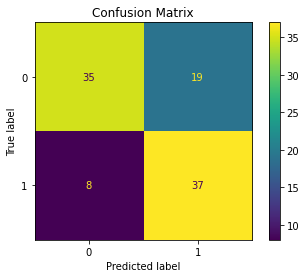

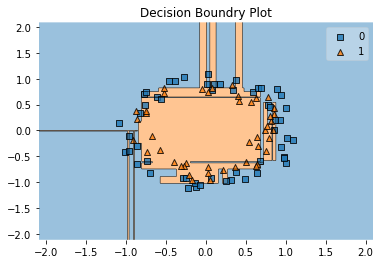

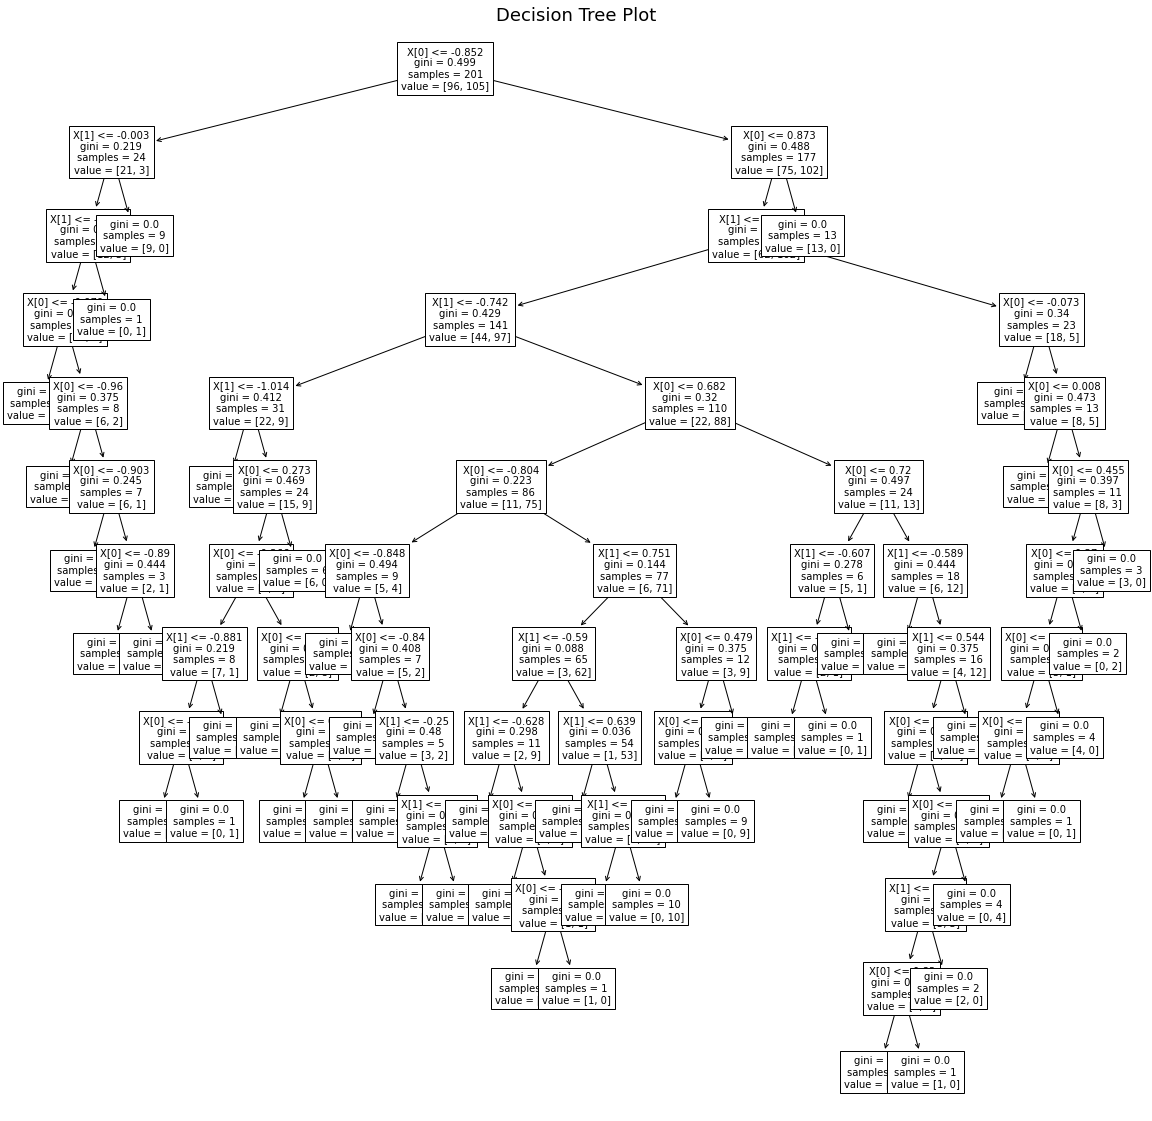

In [13]:
model = DecisionTreeClassifier()
name = type(model).__name__
model.fit(X_train, y_train)

# Model Evaluation
y_predict = model.predict(X_test)
accVal = accuracy_score(y_predict, y_test) * 100
print('Using {} Algorithm'.format(name))
print('============================')
print('Accuracy: {}%'.format(accVal))
print('Classification Report: \n', classification_report(y_predict, y_test))
plot_confusion_matrix(model, X_test, y_test, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Decision Boundary
plot_decision_regions(X_test, y_test, model)
plt.title('Decision Boundry Plot')
plt.show()

# Tree Plotting
plt.figure(figsize=(20,20)) 
plot_tree(model, fontsize=10)
plt.title('Decision Tree Plot', fontsize=18)
plt.show()

## Bagging

In [31]:
class BaggingClassifier:
    def __init__(self, estimator = DecisionTreeClassifier(), n_estimators = 2, sample_size = 1.0):
        self.estimator_ = estimator
        self.n_estimators_ = n_estimators
        self.estimators_accs_ = []
        self.sample_size_ = sample_size
    # End init
    
    def fit(self, X, y):
        self.estimators_ = [clone(self.estimator_) for i in range(self.n_estimators_)]
        for estimator in self.estimators_:
            train_size = X.shape[0]
            n_samples = round(self.sample_size_ * train_size)
            samples = np.random.choice([i for i in range(train_size)], n_samples, replace=True)
            Xtrain = X[samples, :]
            Ytrain = y[samples]
            estimator.fit(Xtrain, Ytrain)
        # End For
    # End of Func
    
    def predict(self, X, y):
        y_predicts = []
        real_preds = []
        acc_val = 0
        
        for estimator in self.estimators_:
            prediction = estimator.predict(X)
            acc_val = accuracy_score(prediction, y)
            self.estimators_accs_.append(acc_val)
            y_predicts.append(prediction)
        # End For
        
        y_predicts = np.array(y_predicts).T
        
        for pred in y_predicts:
            unique_values, count_values = np.unique(pred, return_counts=True)
            real_preds.append(unique_values[np.argmax(count_values)])
        # End For
        
        return np.array(real_preds)
    # End of Func
    
    def predict(self, X):
        y_predicts = []
        real_preds = []
        acc_val = 0
        
        for estimator in self.estimators_:
            prediction = estimator.predict(X)
            y_predicts.append(prediction)
        # End For
        
        y_predicts = np.array(y_predicts).T
        
        for pred in y_predicts:
            unique_values, count_values = np.unique(pred, return_counts=True)
            real_preds.append(unique_values[np.argmax(count_values)])
        # End For
        
        return np.array(real_preds)
    # End of Func
    
    def plt_decision_boundry(self,X, y, n_cols=4):
        # Plotting Figures
        n_rows = math.ceil(self.n_estimators_ / n_cols)
        gs = gridspec.GridSpec(n_rows, n_cols)
        fig = plt.figure(figsize=(n_cols * 5, n_rows * 5))
        
        j = 1
        for clf, acc_val, grd in zip(self.estimators_, self.estimators_accs_, itertools.product([0, 1, 2, 3], repeat=2)):
            ax = plt.subplot(gs[grd[0], grd[1]])
            fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
            plt.title('DT trained using Bag({}) acc: {}%'.format(j, round(acc_val * 100, 3)))
            j += 1
        # End For
        plt.show()
    # End of Func
# End Class

def plotEstimator(teX, teY, estimator, title=''):
    h = .02
    x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
    y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
    # plt.legend()
    plt.title(title)
    plt.show()

## Bagging using 2 Decision Trees

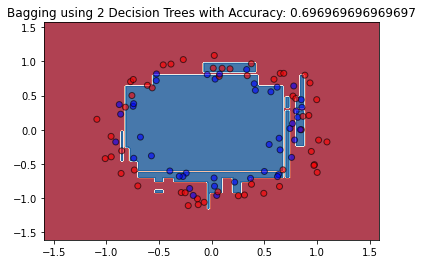

In [33]:
n_ests = 2
cls = BaggingClassifier(n_estimators = n_ests)
cls.fit(X_train, y_train)
ypred = cls.predict(X_test)
acc = accuracy_score(ypred, y_test)
title = "Bagging using {} Decision Trees with Accuracy: {}".format(n_ests, acc)
plotEstimator(X_test, y_test, cls, title=title)

## Bagging using 5 Decision Trees

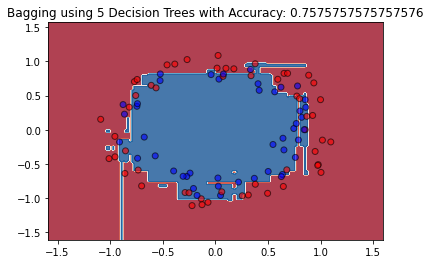

In [48]:
n_ests = 5
cls = BaggingClassifier(n_estimators = n_ests)
cls.fit(X_train, y_train)
ypred = cls.predict(X_test)
acc = accuracy_score(ypred, y_test)
title = "Bagging using {} Decision Trees with Accuracy: {}".format(n_ests, acc)
plotEstimator(X_test, y_test, cls, title=title)

## Bagging using 15 Decision Trees

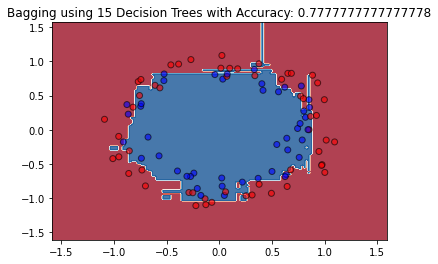

In [49]:
n_ests = 15
cls = BaggingClassifier(n_estimators = n_ests)
cls.fit(X_train, y_train)
ypred = cls.predict(X_test)
acc = accuracy_score(ypred, y_test)
title = "Bagging using {} Decision Trees with Accuracy: {}".format(n_ests, acc)
plotEstimator(X_test, y_test, cls, title=title)

## Bagging using 20 Decision Trees

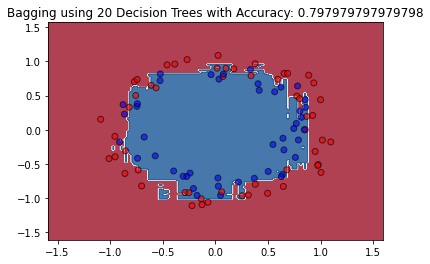

In [50]:
n_ests = 20
cls = BaggingClassifier(n_estimators = n_ests)
cls.fit(X_train, y_train)
ypred = cls.predict(X_test)
acc = accuracy_score(ypred, y_test)
title = "Bagging using {} Decision Trees with Accuracy: {}".format(n_ests, acc)
plotEstimator(X_test, y_test, cls, title=title)

## Boosting

In [19]:
# Training Phase
n_estimators = [10, 50, 100, 200]
learning_rates = [0.1, 1, 2]
models = []
y_pred_vals = []
plt_titles = []
acc_vals = []

for lr in learning_rates:
    for ne in n_estimators:
        
        # Model Training
        model = AdaBoostClassifier(n_estimators=ne, learning_rate=lr, random_state=0)
        name = type(model).__name__
        model.fit(X_train, y_train)
        models.append(model)
        
        # Model Evaluation
        y_predict = model.predict(X_test)
        accVal = round(accuracy_score(y_predict, y_test) * 100, 3)
        plt_title = 'ne: {} , lr: {}, acc: {}'.format(ne, lr, accVal)
        plt_titles.append(plt_title)
        y_pred_vals.append(y_predict)
        acc_vals.append(accVal)

    # End For
# End For

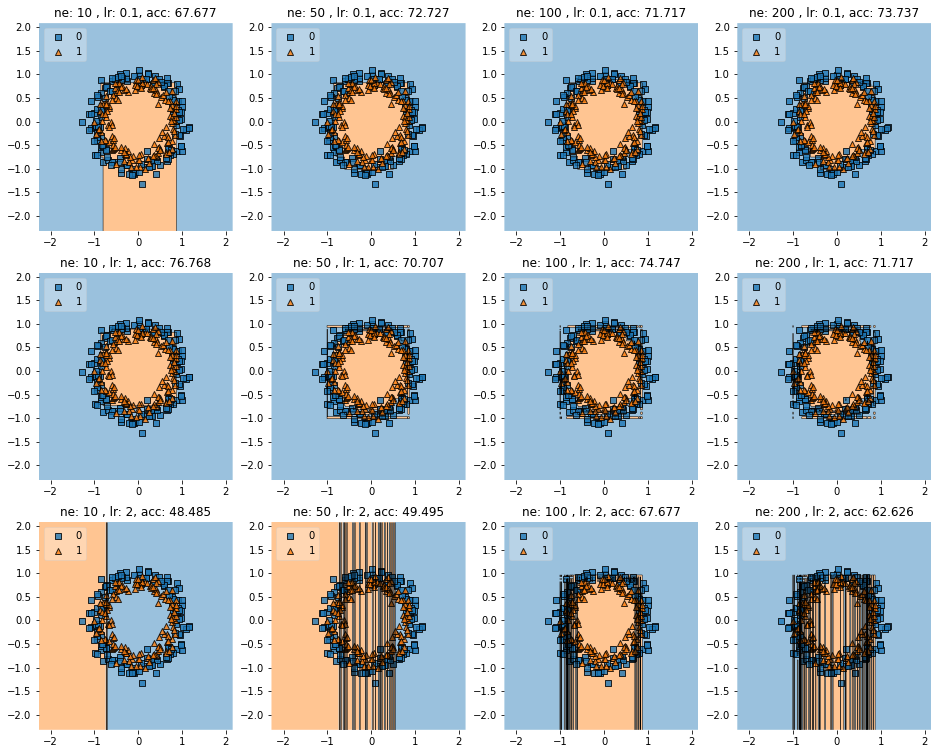

In [20]:
# Plotting Figures
gs = gridspec.GridSpec(len(learning_rates), len(n_estimators))
fig = plt.figure(figsize=(16, 13))

for clf, lab, grd in zip(models, plt_titles, itertools.product([0, 1, 2, 3], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
# End For

plt.show()